In [2]:
import pandas as pd
import numpy as np
from sklearn import ensemble
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
housing = pd.read_csv('Data/Melbourne_housing_FULL.csv')

In [26]:
housing.shape

(34857, 21)

In [27]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [28]:
housing = housing.drop(columns = ['BuildingArea','SellerG','Regionname','Address','Propertycount'])

In [29]:
housing = housing.drop(columns = ['Suburb','CouncilArea','Method'])

In [30]:
housing = housing.drop(columns = ['Lattitude','Longtitude'])

In [31]:
housing.tail()

,Rooms,Type,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt
34852,4,h,1480000.0,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN
34853,2,h,888000.0,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,2018.0
34854,2,t,705000.0,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,2000.0
34855,3,h,1140000.0,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN
34856,2,h,1020000.0,24/02/2018,6.3,3013.0,2.0,1.0,0.0,250.0,1930.0


In [32]:
housing['YearBuilt'].describe()

count    15551.000000
mean      1965.289885
std         37.328178
min       1196.000000
25%       1940.000000
50%       1970.000000
75%       2000.000000
max       2106.000000
Name: YearBuilt, dtype: float64

In [33]:
housingna = pd.DataFrame(housing.dropna())

In [34]:
housingna.shape

(10467, 11)

In [35]:
housingna['Type'].value_counts()

h    7561
u    2048
t     858
Name: Type, dtype: int64

In [36]:
housingna['Day'] = housingna['Date'].apply(lambda x: int(str(x).split('/')[0]) if x == x else np.nan)

In [37]:
housingna['Month'] = housingna['Date'].apply(lambda x: int(str(x).split('/')[1]) if x == x else np.nan)

In [38]:
housingna['Year'] = housingna['Date'].apply(lambda x: int(str(x).split('/')[2]) if x == x else np.nan)

In [39]:
housingna = housingna.drop(columns = ['Date'])
housingna.head()

,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Day,Month,Year
2,2,h,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,1900.0,4,2,2016
4,3,h,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,1900.0,4,3,2017
6,4,h,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,2014.0,4,6,2016
11,3,h,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,1910.0,7,5,2016
14,2,h,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,1890.0,8,10,2016


In [40]:
housingdum = pd.get_dummies(housingna)

In [41]:
housingdum.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Day,Month,Year,Type_h,Type_t,Type_u
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,1900.0,4,2,2016,1,0,0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,1900.0,4,3,2017,1,0,0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,2014.0,4,6,2016,1,0,0
11,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,1910.0,7,5,2016,1,0,0
14,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,1890.0,8,10,2016,1,0,0


In [43]:
y = housingdum['Price']
X = housingdum.loc[:, ~housingdum.columns.isin(['Price'])]



In [50]:
# make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'ls'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X, y)

predict_X = clf.predict(X)





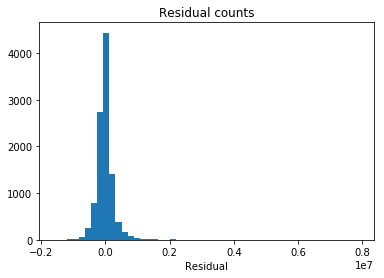

In [58]:

# Extract predicted values.
predicted = predict_X.ravel()
actual = housingdum['Price']

# Calculate the residual.
residual = actual - predicted


plt.hist(residual, bins = 50)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.show()

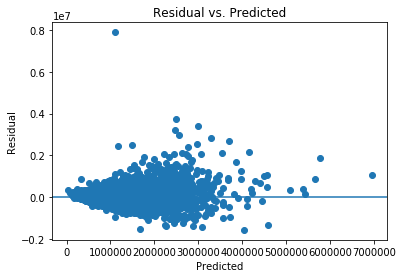

In [59]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

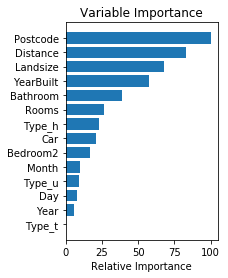

In [47]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()